In [1]:
# SENTENSE  SEGMENTATION
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize, word_tokenize
# Sample text
text = "Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language. It aims to enable computers to understand, interpret, and generate human language in a valuable way."

# Perform sentence segmentation
sentences = sent_tokenize(text)

# Print segmented sentences
for idx, sentence in enumerate(sentences):
    print(f"Sentence {idx+1}: {sentence}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Sentence 1: Natural Language Processing (NLP) is a subfield of artificial intelligence that focuses on the interaction between computers and humans through natural language.
Sentence 2: It aims to enable computers to understand, interpret, and generate human language in a valuable way.


In [2]:

text = "The stars are twinkling at night!"
tokens = word_tokenize(text)
print(tokens)

['The', 'stars', 'are', 'twinkling', 'at', 'night', '!']


In [3]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# choose some words to be stemmed
words = ["program", "programing", "attendance", "winning", "programmers", "Paragraph", "analyzation"]

for w in words:
    print(w, " : ", ps.stem(w))

program  :  program
programing  :  program
attendance  :  attend
winning  :  win
programmers  :  programm
Paragraph  :  paragraph
analyzation  :  analyz


In [4]:
# import these modules
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))
print("best :", lemmatizer.lemmatize("better", pos="n"))



[nltk_data] Downloading package wordnet to /root/nltk_data...


rocks : rock
corpora : corpus
better : good
best : better


In [5]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#download the stopwords resource
import nltk
nltk.download('stopwords')

example_sent = """This is a sample sentence,
                  tenda off the stop words filtration."""

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)



['This', 'is', 'a', 'sample', 'sentence', ',', 'tenda', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'tenda', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#word embedding to show the similarity of words using the CBOW model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,\
	Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the corpus
corpus = ['The cat sat on the mat',
		'The dog ran in the park',
		'The bird sang in the tree']

# Convert the corpus to a sequence of integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting our words in the corpus \
into vector of integers:")
print(sequences)


After converting our words in the corpus into vector of integers:
[[1, 3, 4, 5, 1, 6], [1, 7, 8, 2, 1, 9], [1, 10, 11, 2, 1, 12]]


In [8]:
# Define the parameters AND  build the CBOW model having window size = 2
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 10
window_size = 2
 # Generate the context-target pairs
contexts = []
targets = []
for sequence in sequences:
    for i in range(window_size, len(sequence) - window_size):
        context = sequence[i - window_size:i] +\
            sequence[i + 1:i + window_size + 1]
        target = sequence[i]
        contexts.append(context)
        targets.append(target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)

# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))
model.save_weights('cbow.weights.h5')


# Load the pre-trained weights
model.load_weights('cbow.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# Get the word embeddings AND Visualize the embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

IndexError: list index out of range

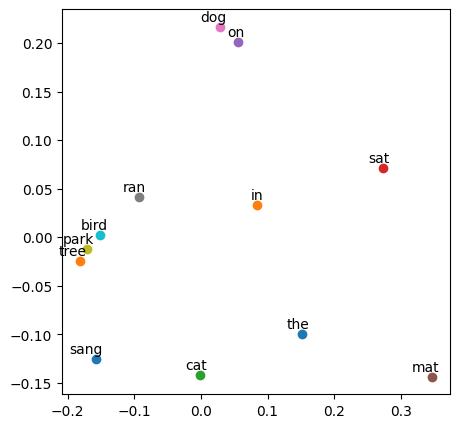

In [11]:
# Get the word embeddings AND Visualize the embeddings
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Fit the model
model.fit(X, np.array(targets), epochs=100, verbose=0)

embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step - loss: 2.5589
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5558
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5528
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.5497
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.5467
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.5436
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.5406
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 2.5375
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.5344
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.5314


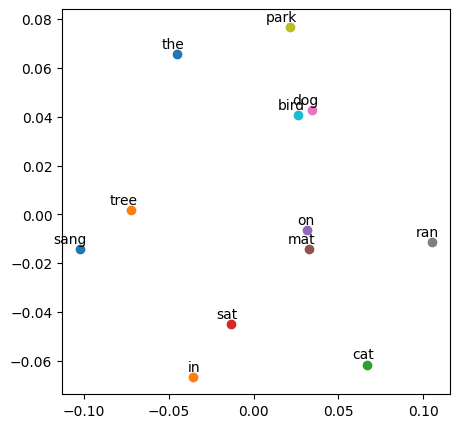

In [12]:
# Define the CBOW model
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(Dense(units=vocab_size, activation='softmax'))

# Compile the model - this step is crucial for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Fit the model to the data (training the model)
model.fit(X, np.array(targets), epochs=10) # Adjust epochs as needed

# Now save the weights after training
model.save_weights('cbow.weights.h5')

# Load the pre-trained weights
model.load_weights('cbow.weights.h5')

# Get the word embeddings AND Visualize the embeddings
embeddings = model.get_weights()[0]

# Perform PCA to reduce the dimensionality
# of the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize the embeddings
plt.figure(figsize=(5, 5))
for i, word in enumerate(tokenizer.word_index.keys()):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points',
                 ha='right', va='bottom')
plt.show()

In [13]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample
documents = [
	"The quick brown fox jumps over the lazy dog.",
	"A journey of a thousand miles begins with a single step.",
]

vectorizer = TfidfVectorizer() # Create the TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()
tfidf_values = {}

for doc_index, doc in enumerate(documents):
	feature_index = tfidf_matrix[doc_index, :].nonzero()[1]
	tfidf_doc_values = zip(feature_index, [tfidf_matrix[doc_index, x] for x in feature_index])
	tfidf_values[doc_index] = {feature_names[i]: value for i, value in tfidf_doc_values}
#let's print
for doc_index, values in tfidf_values.items():
	print(f"Document {doc_index + 1}:")
	for word, tfidf_value in values.items():
		print(f"{word}: {tfidf_value}")
	print("\n")


Document 1:
dog: 0.30151134457776363
lazy: 0.30151134457776363
over: 0.30151134457776363
jumps: 0.30151134457776363
fox: 0.30151134457776363
brown: 0.30151134457776363
quick: 0.30151134457776363
the: 0.6030226891555273


Document 2:
step: 0.3535533905932738
single: 0.3535533905932738
with: 0.3535533905932738
begins: 0.3535533905932738
miles: 0.3535533905932738
thousand: 0.3535533905932738
of: 0.3535533905932738
journey: 0.3535533905932738




In [14]:
#BERT word embedding
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# Compute similarity for each pair of words
for pair in word_pairs:
    tokens = tokenizer(pair, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**tokens)

    # Extract embeddings for the [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :]

    similarity = torch.nn.functional.cosine_similarity(cls_embedding[0], cls_embedding[1], dim=0)

    print(f"Similarity between '{pair[0]}' and '{pair[1]}' using BERT: {similarity:.3f}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Similarity between 'learn' and 'learning' using BERT: 0.930
Similarity between 'india' and 'indian' using BERT: 0.957
Similarity between 'fame' and 'famous' using BERT: 0.956


In [15]:

#cbow
import torch
import torch.nn as nn
import torch.optim as optim

# Define CBOW model
class CBOWModel(nn.Module):
    def __init__(self, vocab_size, embed_size):
        super(CBOWModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.linear = nn.Linear(embed_size, vocab_size)

    def forward(self, context):
        context_embeds = self.embeddings(context).sum(dim=1)
        output = self.linear(context_embeds)
        return output

# Sample data
context_size = 2
raw_text = "word embeddings are awesome"
tokens = raw_text.split()
vocab = set(tokens)
word_to_index = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(tokens) - 2):
    context = [word_to_index[word] for word in tokens[i - 2:i] + tokens[i + 1:i + 3]]
    target = word_to_index[tokens[i]]
    data.append((torch.tensor(context), torch.tensor(target)))

# Hyperparameters
vocab_size = len(vocab)
embed_size = 10
learning_rate = 0.01
epochs = 100

# Initialize CBOW model
cbow_model = CBOWModel(vocab_size, embed_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cbow_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for context, target in data:
        optimizer.zero_grad()
        output = cbow_model(context)
        loss = criterion(output.unsqueeze(0), target.unsqueeze(0))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss}")

# Example usage: Get embedding for a specific word
word_to_lookup = "embeddings"
word_index = word_to_index[word_to_lookup]
embedding = cbow_model.embeddings(torch.tensor([word_index]))
print(f"Embedding for '{word_to_lookup}': {embedding.detach().numpy()}")

Epoch 1, Loss: 0
Epoch 2, Loss: 0
Epoch 3, Loss: 0
Epoch 4, Loss: 0
Epoch 5, Loss: 0
Epoch 6, Loss: 0
Epoch 7, Loss: 0
Epoch 8, Loss: 0
Epoch 9, Loss: 0
Epoch 10, Loss: 0
Epoch 11, Loss: 0
Epoch 12, Loss: 0
Epoch 13, Loss: 0
Epoch 14, Loss: 0
Epoch 15, Loss: 0
Epoch 16, Loss: 0
Epoch 17, Loss: 0
Epoch 18, Loss: 0
Epoch 19, Loss: 0
Epoch 20, Loss: 0
Epoch 21, Loss: 0
Epoch 22, Loss: 0
Epoch 23, Loss: 0
Epoch 24, Loss: 0
Epoch 25, Loss: 0
Epoch 26, Loss: 0
Epoch 27, Loss: 0
Epoch 28, Loss: 0
Epoch 29, Loss: 0
Epoch 30, Loss: 0
Epoch 31, Loss: 0
Epoch 32, Loss: 0
Epoch 33, Loss: 0
Epoch 34, Loss: 0
Epoch 35, Loss: 0
Epoch 36, Loss: 0
Epoch 37, Loss: 0
Epoch 38, Loss: 0
Epoch 39, Loss: 0
Epoch 40, Loss: 0
Epoch 41, Loss: 0
Epoch 42, Loss: 0
Epoch 43, Loss: 0
Epoch 44, Loss: 0
Epoch 45, Loss: 0
Epoch 46, Loss: 0
Epoch 47, Loss: 0
Epoch 48, Loss: 0
Epoch 49, Loss: 0
Epoch 50, Loss: 0
Epoch 51, Loss: 0
Epoch 52, Loss: 0
Epoch 53, Loss: 0
Epoch 54, Loss: 0
Epoch 55, Loss: 0
Epoch 56, Loss: 0
E

In [16]:
# input string
string = "PYthon 3.0, released in 2008, was a major revision of the language that is not completely backward compatible and much Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x[30] and later are supported, with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows)."
print(string)

PYthon 3.0, released in 2008, was a major revision of the language that is not completely backward compatible and much Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x[30] and later are supported, with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows).


In [17]:
# input string
string = "	 Python 3.0, Released in 2008, was a major revision of the language that is not completely backward compatible and much Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x[30] and later are supported, with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows)."

# convert to lower case
lower_string = string.lower()
print(lower_string)


	 python 3.0, released in 2008, was a major revision of the language that is not completely backward compatible and much python 2 code does not run unmodified on python 3. with python 2's end-of-life, only python 3.6.x[30] and later are supported, with older versions still supporting e.g. windows 7 (and old installers not restricted to 64-bit windows).


In [18]:
# import regex
import re

# input string
string = "	 Python 3.0, released in 2008, was a major revision of the language that is not completely backward compatible and much Python 2 code does not run unmodified on Python 3. With Python 2's end-of-life, only Python 3.6.x[30] and later are supported, with older versions still supporting e.g. Windows 7 (and old installers not restricted to 64-bit Windows)."

# convert to lower case
lower_string = string.lower()

# remove numbers
no_number_string = re.sub(r'\d+','',lower_string)
print(no_number_string)


	 python ., released in , was a major revision of the language that is not completely backward compatible and much python  code does not run unmodified on python . with python 's end-of-life, only python ..x[] and later are supported, with older versions still supporting e.g. windows  (and old installers not restricted to -bit windows).
